# Multi-Armed Bandit Simulation

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [6]:
class MultiArmedBandit:
    def __init__(self, num_arms, reward_distributions):
        self.num_arms = num_arms
        self.reward_distributions = reward_distributions

    def pull_arm(self, arm):
        mean, std_dev = self.reward_distributions[arm]
        return np.random.normal(mean, std_dev)

# Example setup:
# Define reward distributions as a list of tuples (mean, standard deviation)
reward_means_stds = [(0.2, 0.05), (0.5, 0.1), (0.7, 0.15), (0.3, 0.07), (0.4, 0.12)]
# Calculate the number of arms based on the length of the reward distributions list
total_arms = len(reward_means_stds)

# Initialize the MultiArmedBandit with the number of arms and their corresponding reward distributions
bandit_instance = MultiArmedBandit(total_arms, reward_means_stds)


In [7]:
import numpy as np

class Agent:
    def __init__(self, num_arms, epsilon):
        self.num_arms = num_arms
        self.epsilon = epsilon
        self.arm_selection_counts = np.zeros(num_arms)
        self.arm_accumulated_rewards = np.zeros(num_arms)

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            # Explore: randomly choose an arm
            return np.random.randint(0, self.num_arms)
        else:
            # Exploit: choose the arm with the highest average reward
            average_rewards = self.arm_accumulated_rewards / (self.arm_selection_counts + 1e-10)
            return np.argmax(average_rewards)

    def update(self, arm, reward):
        # Update the count of times the arm was selected
        self.arm_selection_counts[arm] += 1
        # Update the accumulated rewards for the arm
        self.arm_accumulated_rewards[arm] += reward

# Example usage:
# Initialize an agent with a certain number of arms and an epsilon value
# agent_instance = Agent(num_arms, epsilon=0.1)


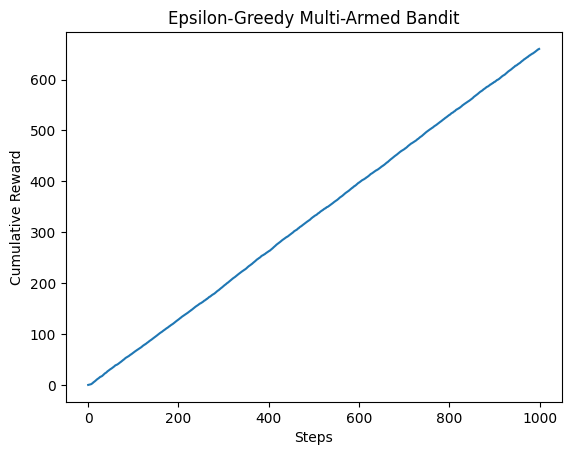

In [10]:
def simulate_bandit(num_arms, reward_means_stds, epsilon, total_steps):
    # Initialize the bandit and agent with the given parameters
    bandit = MultiArmedBandit(num_arms, reward_means_stds)
    agent = Agent(num_arms, epsilon)

    # Initialize an array to store rewards for each step
    rewards_over_time = np.zeros(total_steps)

    # Run the simulation for the specified number of steps
    for step in range(total_steps):
        # Agent selects an arm to pull
        chosen_arm = agent.select_arm()
        # Bandit provides a reward for the chosen arm
        reward = bandit.pull_arm(chosen_arm)
        # Agent updates its knowledge with the received reward
        agent.update(chosen_arm, reward)
        # Store the received reward in the rewards array
        rewards_over_time[step] = reward

    # Calculate cumulative rewards over time
    cumulative_rewards = np.cumsum(rewards_over_time)
    return cumulative_rewards

if __name__ == '__main__':
    # Define reward distributions as a list of tuples (mean, standard deviation)
    reward_means_stds = [(0.2, 0.05), (0.5, 0.1), (0.7, 0.15), (0.3, 0.07), (0.4, 0.12)]
    # Calculate the number of arms based on the length of the reward distributions list
    num_arms = len(reward_means_stds)
    # Set the epsilon parameter for the epsilon-greedy strategy
    epsilon = 0.1
    # Define the number of steps for the simulation
    total_steps = 1000

    # Run the simulation and get cumulative rewards
    cumulative_rewards = simulate_bandit(num_arms, reward_means_stds, epsilon, total_steps)

    # Plot the cumulative rewards over time
    plt.plot(cumulative_rewards)
    plt.xlabel('Steps')
    plt.ylabel('Cumulative Reward')
    plt.title('Epsilon-Greedy Multi-Armed Bandit')
    plt.savefig('bandit_simulation.png')
    plt.show()
